In [268]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 📌 Extracción

Importamos los datos

In [269]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
#https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json
response = requests.get(url)
data = response.json()
data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

Convertimos el archivo en un DataFrame

In [270]:
df = pd.DataFrame(data)
#df.head() # Los datos se muestran en lista

Normalizamos los datos y lo convertimos en dataframe

In [271]:
df = pd.json_normalize(data= data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformación

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [273]:
for col in df.columns:
    print(f"Valores unicos en la columna'{col}:{df[col].nunique()}'")
    if df[col].nunique()<50:
        print(df[col].unique())
        print("-"*50)

Valores unicos en la columna'customerID:7267'
Valores unicos en la columna'Churn:3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender:2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen:2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure:73'
Valores unicos en la columna'phone.PhoneService:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines:3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna'internet.InternetService:3'
['DSL' 'Fiber optic' 'No']
--------

In [274]:
df.apply(lambda x:x.astype(str).str.strip()=="").sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

#### Modificamos los datos necesarios

Convertimos los datos de Charges.Total en datos de tipo float.
object --> float

In [275]:
df["account.Charges.Total"] = df["account.Charges.Total"].apply(pd.to_numeric, errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Eliminamos los datos vacíos de la columna churn

In [276]:
df = df[df["Churn"].str.strip() != ""]
# Verificamos los datos
df.apply(lambda x:x.astype(str).str.strip()=="").sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [278]:
df.isnull().sum()

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

In [279]:
df = df.dropna(subset=["account.Charges.Total"])

In [280]:
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

#### Columna cuentas_diarias 

Considerando que un mes no tiene una cantidad de días constante, tomaremos el promedio que es el de 30.4 días.

In [281]:
df["Cuentas_diarias"] = df["account.Charges.Monthly"]/30.4
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.157895
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.970395
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.430921
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.223684
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.759868


Convertimos los "Si" y "No" en binario.


In [282]:
for col in df.select_dtypes(include="object").columns:

    unique_vals = set(df[col].str.lower().unique())
    if unique_vals == {"yes", "no"}:
        df[col] = df[col].str.lower().map({"yes": 1, "no": 0})

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.157895
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.970395
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.430921
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.223684
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.759868


Observemos que para algunas columnas el convertir de "yes" y "no" a binarios no es posible porque tienen una tercera opción.


In [283]:
df["phone.MultipleLines"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [284]:
#Traducimos
diccionario_espanol = {
    'Yes': 'Sí',
    'No': 'No',
    'Male': 'Hombre',
    'Female': 'Mujer',
    
    'No phone service': 'Sin servicio telefónico',
    'No internet service': 'Sin servicio de internet',
    'Fiber optic': 'Fibra óptica',
    
    'Month-to-month': 'Mensual',
    'One year': 'Un año',
    'Two year': 'Dos años',
    
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito'
}
cols_categoricas = df.select_dtypes(include='object').columns

df[cols_categoricas] = df[cols_categoricas].replace(diccionario_espanol)

print(df.head())

   customerID  Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO      0           Mujer                       0   
1  0003-MKNFE      0          Hombre                       0   
2  0004-TLHLJ      1          Hombre                       0   
3  0011-IGKFF      1          Hombre                       1   
4  0013-EXCHZ      1           Mujer                       1   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone.MultipleLines internet.InternetService  ... internet.DeviceProtection  \
0                  No                      DSL 

# 📊 Carga y análisis

In [285]:
df["Cuentas_diarias"].describe()

count    7032.000000
mean        2.131520
std         0.989670
min         0.600329
25%         1.170641
50%         2.314145
75%         2.956003
max         3.906250
Name: Cuentas_diarias, dtype: float64

Creamos un gráfico de pastel para observar la distribución de clientes que cancelaron y clientes que no cancelaron su plan.

In [286]:
num_unos = df["Churn"].sum() #Solo para comprobar el número de 1s
print(num_unos)

1869


In [287]:
plt.style.use("_mpl-gallery-nogrid")

Val = df["Churn"].value_counts().sort_index().tolist()

colors = plt.get_cmap("Accent")(np.linspace(0.2, 0.7, len(Val)))
print(Val)

[5163, 1869]


#📄Informe final

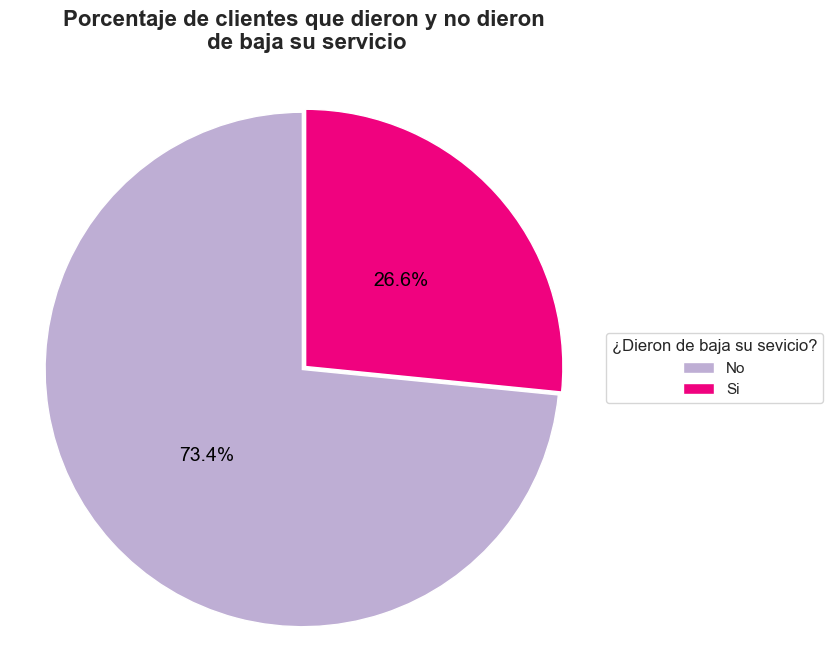

In [288]:
labels = [ "No", "Si"]

fig, ax = plt.subplots(figsize=(6, 6))

explode = (0.03, 0.03) 

ax.pie(Val, 
       colors=colors, 
       radius=3.5, 
       center=(4, 4), 
       autopct='%1.1f%%',
       pctdistance=0.5,
       explode=explode,
       startangle=90,
       textprops={"fontsize": 14, "color": "black"}, 
       frame=True
       )

ax.legend(labels,
          title="¿Dieron de baja su sevicio?", 
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax.axis("off") 
ax.set_aspect("equal")
plt.title("Porcentaje de clientes que dieron y no dieron\n de baja su servicio", fontsize=16, weight="bold", pad=18)

plt.show()

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago.

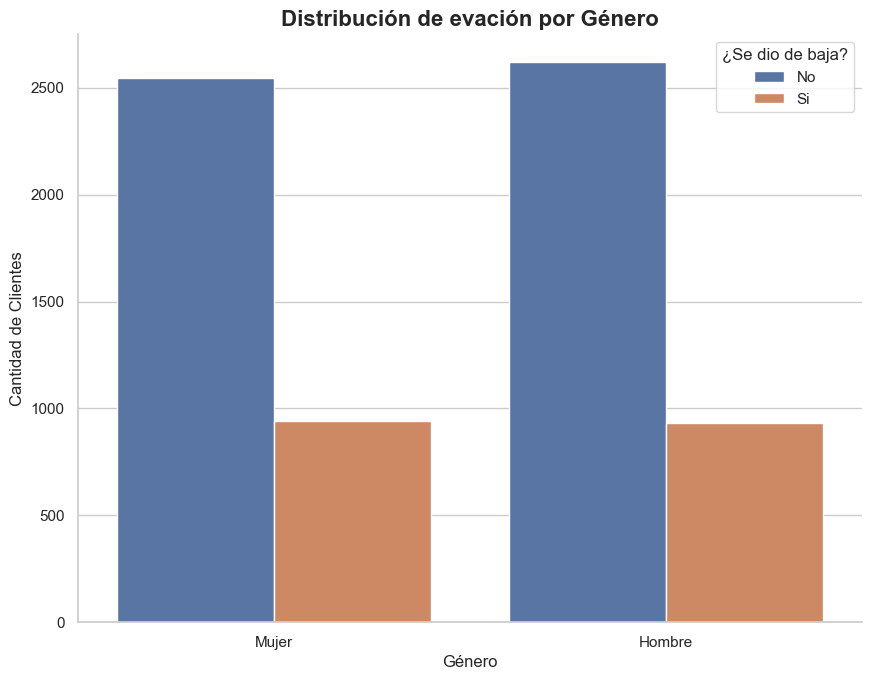

In [289]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="customer.gender", hue="Churn", palette="deep")

plt.title("Distribución de evación por Género", fontsize=16, fontweight="bold")
plt.xlabel("Género", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.legend(labels, title="¿Se dio de baja?")
sns.despine()
plt.show()

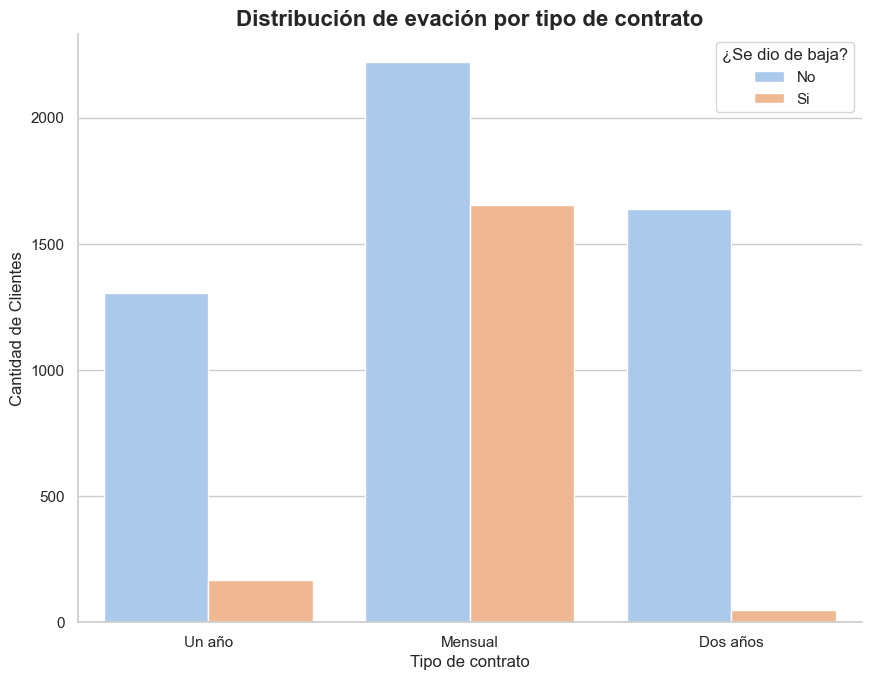

In [290]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="account.Contract", hue="Churn", palette="pastel")

plt.title("Distribución de evación por tipo de contrato", fontsize=16, fontweight="bold")
plt.xlabel("Tipo de contrato", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.legend(labels, title="¿Se dio de baja?")
sns.despine()
plt.show()

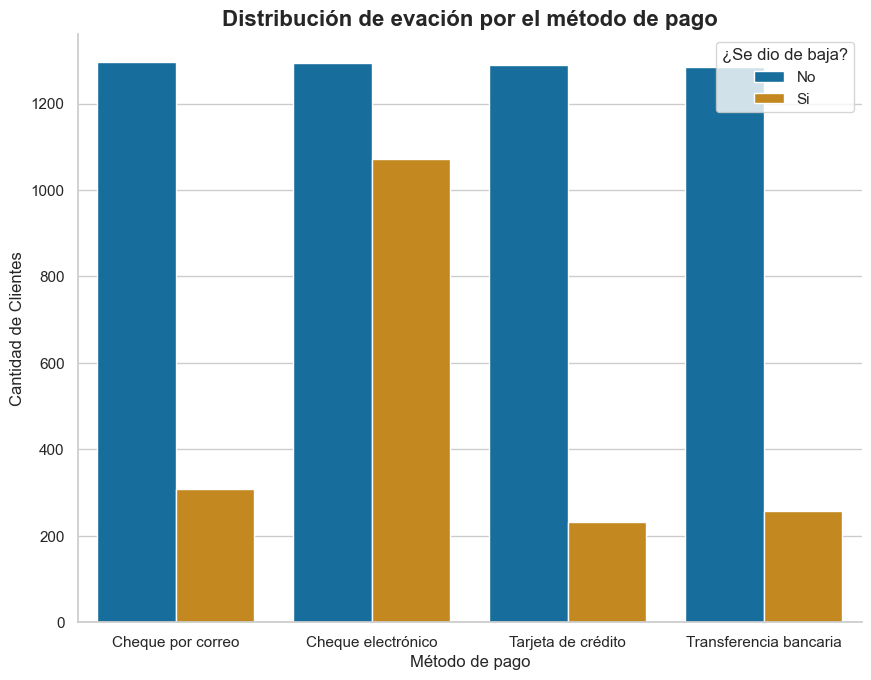

In [291]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="account.PaymentMethod", hue="Churn", palette="colorblind")

plt.title("Distribución de evación por el método de pago", fontsize=16, fontweight="bold")
plt.xlabel("Método de pago", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.legend(labels, title="¿Se dio de baja?")
sns.despine()
plt.show()

In [292]:
df["customer.tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer.tenure, dtype: float64